In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Myntra Fasion Clothing.csv')

data.head(5)

/var/folders/hs/bg0sjys12tqgftpwb7z0s8j00000gn/T/ipykernel_74766/373876100.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Myntra Fasion Clothing.csv')


,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


Label Distribution:
 Indian Wear                 145845
Western                     140992
Topwear                      74537
Bottom Wear                  55439
Lingerie & Sleep Wear        55258
Sports Wear                  20627
Inner Wear &  Sleep Wear     20370
Plus Size                    13496
Name: Category, dtype: int64


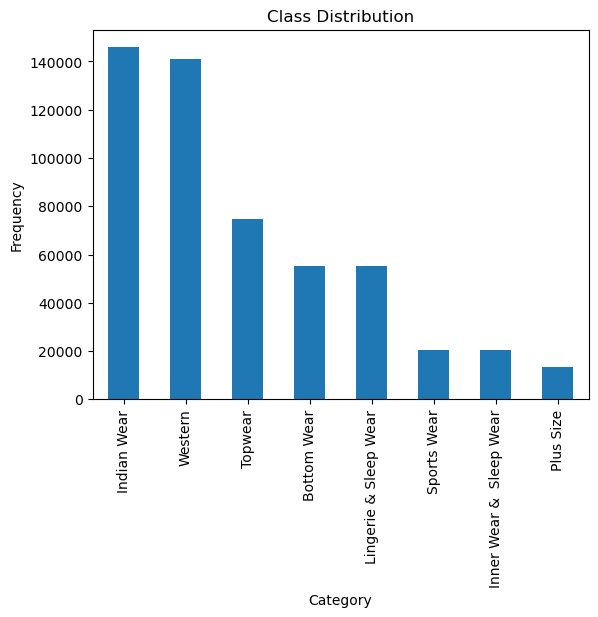

In [6]:
labels = data['Category'].value_counts()
print("Label Distribution:\n", labels)


labels.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


In [5]:

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yashrajsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yashrajsingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
def preprocess(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['Description'] = data['Description'].apply(preprocess)

In [7]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Description'])
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Precision: 0.9526213837895823
Recall: 0.9302704002857793
F1 Score: 0.9406239807402943
Accuracy: 0.9640215358027974
Classification Report:
                           precision    recall  f1-score   support

             Bottom Wear       0.99      1.00      0.99     11193
             Indian Wear       0.97      0.97      0.97     29089
Inner Wear &  Sleep Wear       0.99      0.99      0.99      4043
   Lingerie & Sleep Wear       0.99      0.99      0.99     11113
               Plus Size       0.90      0.79      0.84      2731
             Sports Wear       0.86      0.76      0.81      4135
                 Topwear       0.97      0.97      0.97     14898
                 Western       0.95      0.98      0.96     28111

                accuracy                           0.96    105313
               macro avg       0.95      0.93      0.94    105313
            weighted avg       0.96      0.96      0.96    105313



In [15]:
ls_classifier = LogisticRegression(max_iter=1000)
ls_classifier.fit(X_train, y_train)

y_pred = ls_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Classification Report:
                           precision    recall  f1-score   support

             Bottom Wear       0.99      1.00      0.99     11193
             Indian Wear       0.97      0.96      0.97     29089
Inner Wear &  Sleep Wear       0.99      0.98      0.99      4043
   Lingerie & Sleep Wear       0.99      0.99      0.99     11113
               Plus Size       0.87      0.92      0.89      2731
             Sports Wear       0.84      0.78      0.81      4135
                 Topwear       0.97      0.96      0.97     14898
                 Western       0.95      0.97      0.96     28111

                accuracy                           0.97    105313
               macro avg       0.95      0.95      0.95    105313
            weighted avg       0.97      0.97      0.97    105313

Precision: 0.9484804314241384
Recall: 0.9464405134242644
F1 Score: 0.9472098720304751
Accuracy: 0.9652654468109351


Picking the Best Model

In [8]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

joblib.dump(classifier, 'text_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

Accuracy: 0.9652654468109351
Classification Report:
                           precision    recall  f1-score   support

             Bottom Wear       0.99      1.00      0.99     11193
             Indian Wear       0.97      0.96      0.97     29089
Inner Wear &  Sleep Wear       0.99      0.98      0.99      4043
   Lingerie & Sleep Wear       0.99      0.99      0.99     11113
               Plus Size       0.87      0.92      0.89      2731
             Sports Wear       0.84      0.78      0.81      4135
                 Topwear       0.97      0.96      0.97     14898
                 Western       0.95      0.97      0.96     28111

                accuracy                           0.97    105313
               macro avg       0.95      0.95      0.95    105313
            weighted avg       0.97      0.97      0.97    105313



['tfidf_vectorizer.pkl']

In [9]:
def predict_category(text):

    processed_text = preprocess(text)
    text_features = vectorizer.transform([processed_text])
    
    predicted_category = classifier.predict(text_features)
    
    return predicted_category[0]

In [13]:
predict_category('women printed woolen kurta')

'Indian Wear'